In [ ]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import math
from matplotlib import pyplot as plt


/kaggle/input/mnist-digit-recognizer/train.csv


In [4]:
data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(data)
m,n= data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev/255

data_train=data[1000:m].T
y_train=data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [8]:
x_train[:,0].shape

(784,)

# dot() used for matrix multiplication cz W1 is an array

# One_hot is used for making a label to matrix 


In [9]:
def init_params():
    W1=np.random.randn(10,784)* np.sqrt(2/784)
    b1=np.random.randn(10,1)-0.5
    W2=np.random.randn(10,10)*np.sqrt(2/10)
    b2=np.random.randn(10,1)-0.5
    return W1, b1,W2,b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2,b2, X):
    Z1 = W1.dot(X)+ b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+ b2
    A2 = softmax(Z2)
    return Z1 , A1 , Z2 ,A2

def one_hot(Y):
    one_hot_Y= np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
def back_prop(Z1, A1,Z2, A2,W1, W2,X, Y):
    m = Y.shape[0]
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1 , W2, b2 = gradient_descent(x_train,y_train,0.5,500)

Iteration:  0
[7 7 7 ... 7 7 7] [2 6 6 ... 8 8 2]
0.1121219512195122
Iteration:  10
[2 2 2 ... 2 2 2] [2 6 6 ... 8 8 2]
0.09919512195121952
Iteration:  20
[1 8 2 ... 1 1 2] [2 6 6 ... 8 8 2]
0.24739024390243902
Iteration:  30
[3 8 2 ... 1 1 2] [2 6 6 ... 8 8 2]
0.3659512195121951
Iteration:  40
[7 6 6 ... 3 3 2] [2 6 6 ... 8 8 2]
0.5456585365853659
Iteration:  50
[7 6 6 ... 3 3 2] [2 6 6 ... 8 8 2]
0.6024390243902439
Iteration:  60
[7 6 6 ... 3 8 2] [2 6 6 ... 8 8 2]
0.636219512195122
Iteration:  70
[7 6 6 ... 3 3 2] [2 6 6 ... 8 8 2]
0.6615853658536586
Iteration:  80
[7 6 6 ... 3 3 2] [2 6 6 ... 8 8 2]
0.6714390243902439
Iteration:  90
[7 6 2 ... 8 8 2] [2 6 6 ... 8 8 2]
0.6999268292682926
Iteration:  100
[7 6 6 ... 3 3 2] [2 6 6 ... 8 8 2]
0.6638536585365854
Iteration:  110
[7 6 6 ... 3 3 2] [2 6 6 ... 8 8 2]
0.7080487804878048
Iteration:  120
[7 6 6 ... 3 8 2] [2 6 6 ... 8 8 2]
0.7263658536585366
Iteration:  130
[7 6 6 ... 8 8 2] [2 6 6 ... 8 8 2]
0.7414878048780488
Iteration:  140


In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  2


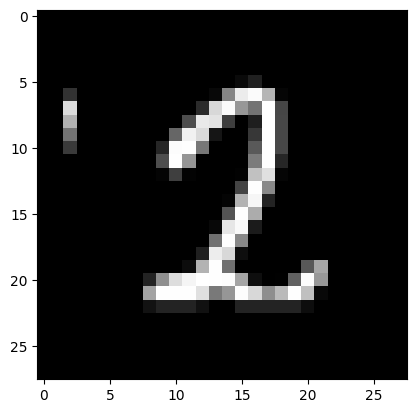

Prediction:  [6]
Label:  6


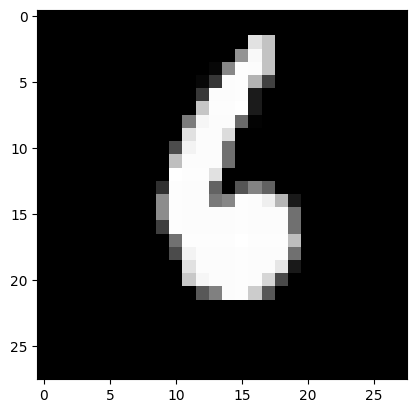

Prediction:  [2]
Label:  6


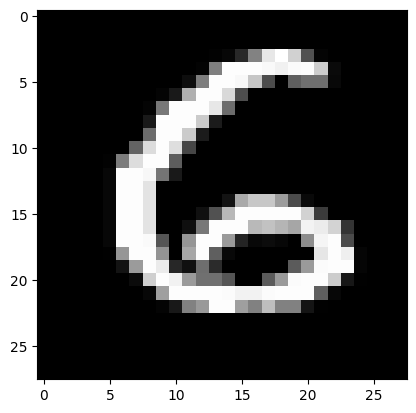

Prediction:  [7]
Label:  7


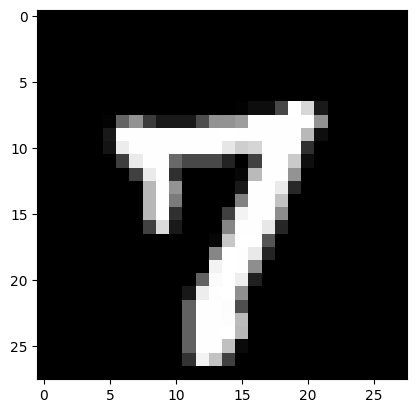

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


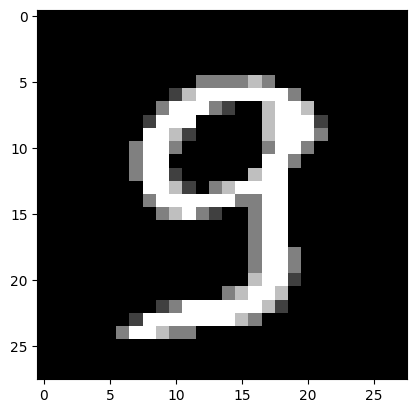

Prediction:  [4]
Label:  4


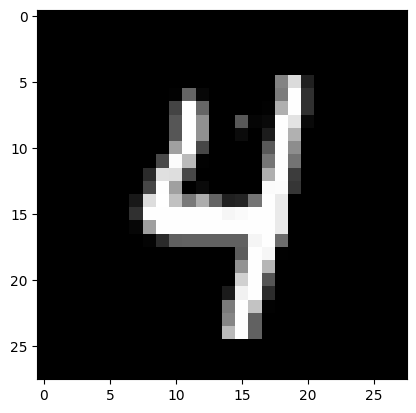

Prediction:  [8]
Label:  3


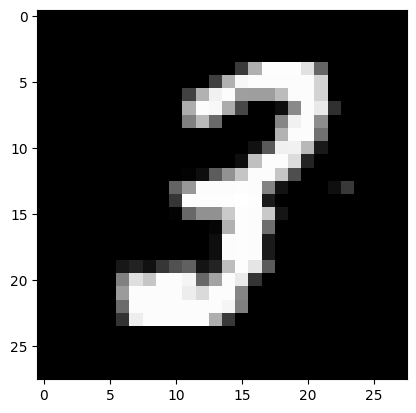

Prediction:  [0]
Label:  0


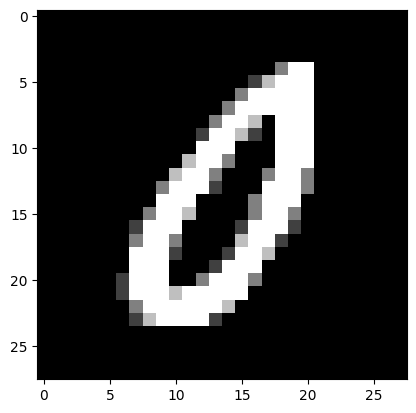

In [19]:
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
